In [10]:
import csv
import matplotlib.pyplot as plt
import numpy as np

def calculate_k(csv_file, totalizer, first_timestamp):
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        rows = list(reader)

        if len(rows) == 0:
            return None

        timestamp_values = [float(row['Timestamp']) for row in rows]
        volume_flow_values = [float(row['Volume Flow']) for row in rows]

        plt.plot(timestamp_values, volume_flow_values)
        plt.xlabel('time')
        plt.ylabel('volume flow')
        plt.grid(True)
        plt.show()

        mean_volume_flow = sum(volume_flow_values) / len(volume_flow_values)
        last_timestamp = timestamp_values[-1]
        result = totalizer / (mean_volume_flow * (last_timestamp-first_timestamp))
        return result, mean_volume_flow
    
def calculate_ks(paths):#, totalizer, first_timestamp):
    means = []
    k = []
    plt.figure(figsize=(10, 6))

    for path in paths:
        csv_file = path[0]
        totalizer = path[1]
        first_timestamp = path[2]
        with open(csv_file, 'r') as file:
            reader = csv.DictReader(file)
            rows = list(reader)

            if len(rows) == 0:
                return None

            timestamp_values = [float(row['Timestamp']) for row in rows]
            volume_flow_values = [float(row['Volume Flow']) for row in rows]

            plt.plot(timestamp_values, volume_flow_values, label=csv_file)
            #plt.xlabel('time')
            #plt.ylabel('volume flow')
            #plt.grid(True)
            #plt.show()

            mean_volume_flow = sum(volume_flow_values) / len(volume_flow_values)
            means.append(mean_volume_flow)
            last_timestamp = timestamp_values[-1]
            result = 3600 * totalizer / (mean_volume_flow * (last_timestamp-first_timestamp))
            k.append(result)
    plt.xlabel('time')
    plt.ylabel('volume flow')
    plt.grid(True)
    plt.legend(prop={'size': 8},loc='lower right')
    plt.show()

    plt.plot(means, k, 'o')
    plt.xlabel('volume flow mean')
    plt.ylabel('k')
    plt.grid(True)
    plt.show()
    return means, k

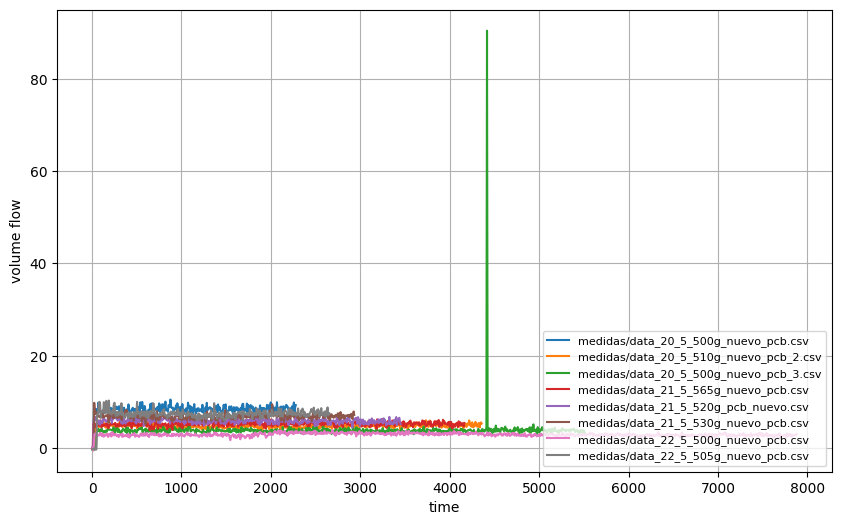

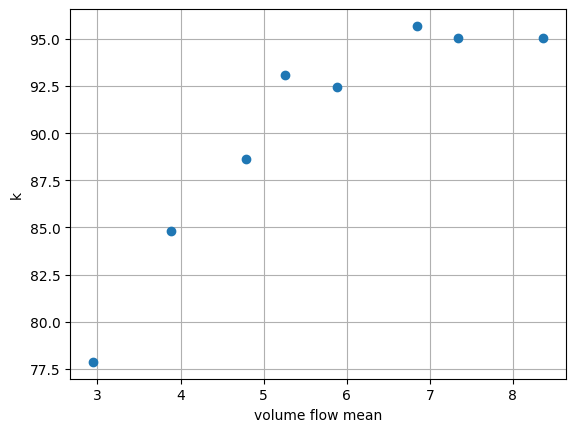

In [11]:
# Usage example
#file_path_0 = 'data_11_5_1000g_garrafa2_regulador_nuevo.csv'  
#k_value_0 = calculate_k(file_path_0, 1000, 30.65)
#file_path_1 = 'data_11_5_1000g_garrafa2_regulador_nuevo_2.csv'  
#k_value_1 = calculate_k(file_path_1, 1000, 25.91)
#file_path_2 = 'data_12_5_1010g_garrafa2_regulador_nuevo.csv'  
#k_value_2 = calculate_k(file_path_2, 1010, 24.71)

#print("k value 0:", k_value_0)
#print("k value 1:", k_value_1)
#print("k value 2:", k_value_2)

[means, ks] = calculate_ks([#['medidas/data_12_5_1010g_garrafa2_regulador_nuevo.csv',1010,9.7], 
              #['medidas/data_11_5_1000g_garrafa2_regulador_nuevo_2.csv', 1000, 25.91],
              #['medidas/data_18_5_1000g_garrafa3.csv', 1000, 0],
              #['medidas/data_18_5_315g_garrafa3.csv', 315, 0],
              #['medidas/data_18_5_200g_garrafa3.csv', 200, 0],
              #['medidas/data_19_5_500g_garrafa3.csv',500,25.58],
              #['medidas/data_19_5_500g_garrafa3_2.csv',500,1.2],
              #['medidas/data_19_5_500g_garrafa3_3.csv',500,11.32],
              #['medidas/data_19_5_530g_garrafa3_4.csv',530,29.24],
              #['medidas/data_19_5_500g_garrafa3_5.csv',500,48.41],
              #['medidas/data_19_5_525g_garrafa3_6.csv',525,23.52],
              ['medidas/data_20_5_500g_nuevo_pcb.csv',500,15.07],
              ['medidas/data_20_5_510g_nuevo_pcb_2.csv',510,26.99],
              ['medidas/data_20_5_500g_nuevo_pcb_3.csv',500,44.96],
              ['medidas/data_21_5_565g_nuevo_pcb.csv',565,8.07],
              ['medidas/data_21_5_520g_pcb_nuevo.csv',520,8.07],
              ['medidas/data_21_5_530g_nuevo_pcb.csv',530,17.61],
              ['medidas/data_22_5_500g_nuevo_pcb.csv',500,19.12],
              ['medidas/data_22_5_505g_nuevo_pcb.csv',505,48.37]])
              #['data_18_5_155g_error_com.csv', 155, 0],
              #['data_18_5_210g.csv', 210, 0],])

In [7]:
print(means,ks)

[8.367846491885839, 4.783970550881743, 3.882384318501535, 5.25752074988934, 5.882488684925206] [95.04605678444963, 88.62874799168696, 84.83212971042612, 92.28475301049399, 92.42689772982197]


 
1.71 x + 80.07


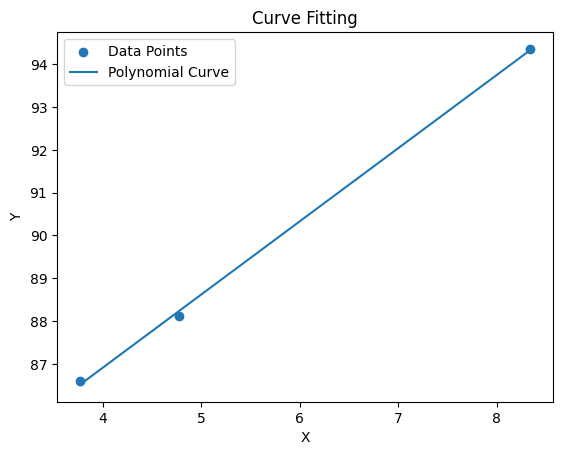

In [48]:
# Generate some example data
#x = means
#y = ks
x = [8.3422, 3.7669, 4.7763]
y = [94.357, 86.592, 88.131]

# Perform polynomial regression
degree = 1  # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, y, degree)
poly = np.poly1d(coefficients)
print(poly)

# Generate a set of x values for the curve
x_curve = np.linspace(min(x), max(x), 100)

# Plot the original data points
plt.scatter(x, y, label='Data Points')

# Plot the curve
plt.plot(x_curve, poly(x_curve), label='Polynomial Curve')

# Additional curve fitting techniques can be explored here

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curve Fitting')

# Add legend
plt.legend()

# Show the plot
plt.show()


ln(          2
-0.5943 x + 1.038 x + 6.343 )


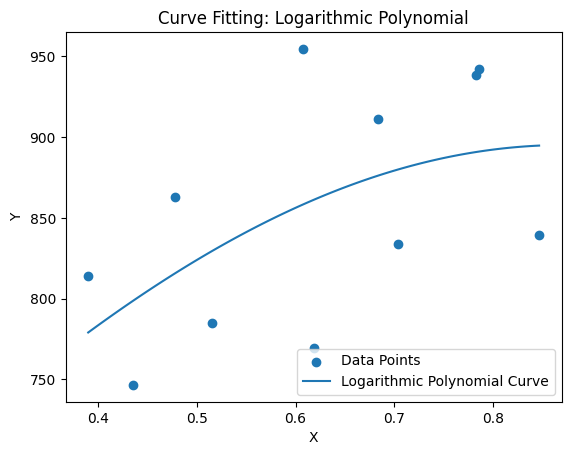

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
x = means
y = ks

# Perform logarithmic transformation on y-values
y_log = np.log(y)

# Perform polynomial regression on transformed data
degree = 2 # Adjust the degree of the polynomial as needed
coefficients = np.polyfit(x, y_log, degree)
poly = np.poly1d(coefficients)
print('ln(',poly,')')

# Generate a set of x values for the curve
x_curve = np.linspace(min(x), max(x), 100)

# Calculate the y-values for the curve using the inverse of the logarithmic transformation
y_curve = np.exp(poly(x_curve))

# Plot the original data points
plt.scatter(x, y, label='Data Points')

# Plot the curve
plt.plot(x_curve, y_curve, label='Logarithmic Polynomial Curve')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curve Fitting: Logarithmic Polynomial')

# Add legend
plt.legend()

# Show the plot
plt.show()
